In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import datetime
import sys
from tqdm import tqdm
import os
import random

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
config = f"""
execution:
    debug: False
    submit: False

dataset: 
    competition_dir: /kaggle/input/child-mind-institute-detect-sleep-states
    
seed: 46
"""

CFG = yaml.load(config, Loader=yaml.SafeLoader)

In [3]:
labels = pd.read_csv(f"{CFG['dataset']['competition_dir']}/train_events.csv").dropna()
labels.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


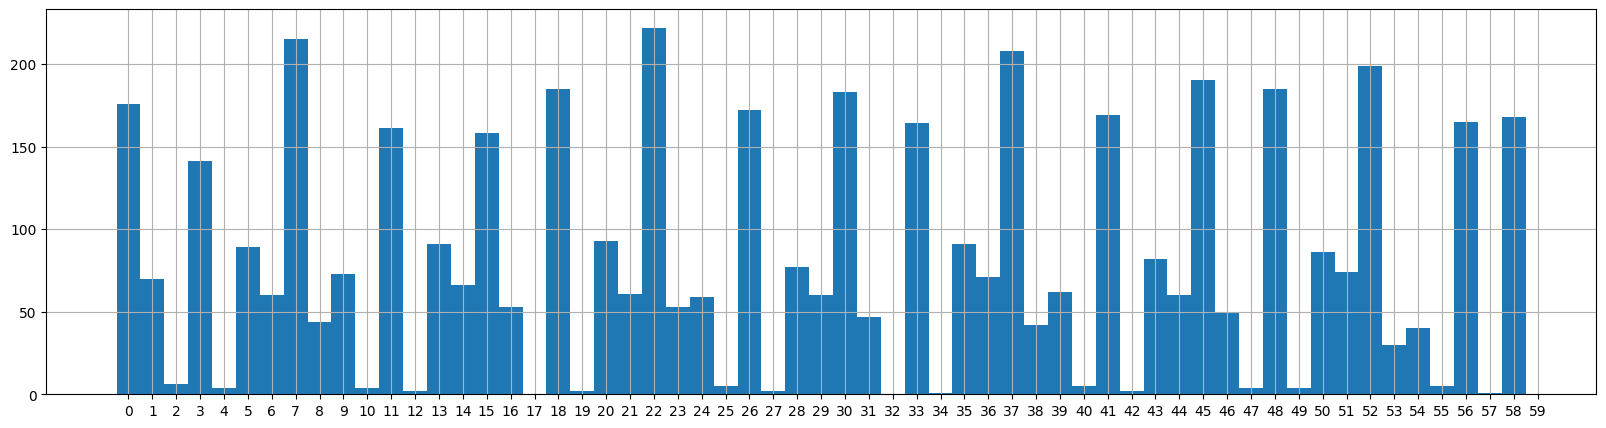

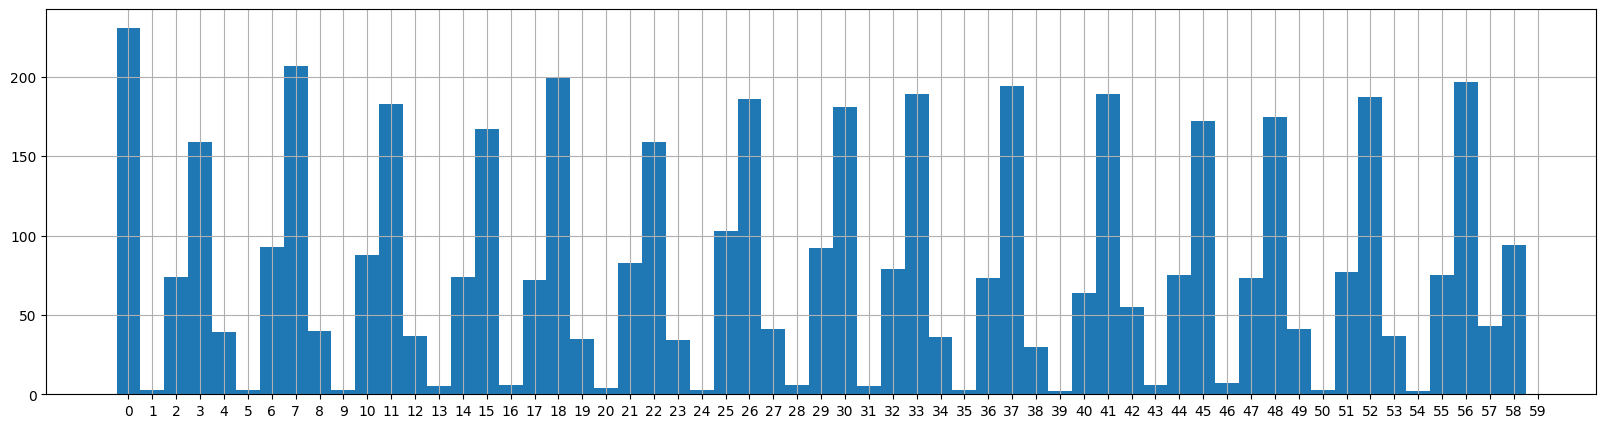

In [4]:
# 就寝する分
df = labels[labels["event"]=="onset"]
df["minute"] = df["timestamp"].str[-10:-8].astype(int)
df["minute"].value_counts().reset_index().rename(columns={"index": "minute", "minute": "count"}).sort_values("minute").to_csv("onset.csv", index=False)
plt.subplots(figsize=(20, 5))
plt.hist(df["minute"], bins=range(60), align="left")
plt.xticks(np.arange(0, 60, 1))
plt.grid()
plt.show()

# 起床する分
df = labels[labels["event"]=="wakeup"]
df["minute"] = df["timestamp"].str[-10:-8].astype(int)
df["minute"].value_counts().reset_index().rename(columns={"index": "minute", "minute": "count"}).sort_values("minute").to_csv("wakeup.csv", index=False)
plt.subplots(figsize=(20, 5))
plt.hist(df["minute"], bins=range(60), align="left")
plt.xticks(np.arange(0, 60, 1))
plt.grid()
plt.show()